In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, pandas, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'/home/mike/Desktop/Tesis'

## Terminologia
- sr = sampling ratio (Hz)
- frame = short audio clip (columna de espectros)
- n_fft = samples per frame
- hop_length = numero de samples entre frames

## Caracteristicas del audio

In [4]:
x, sr = librosa.load('primero')

In [5]:
print((type(x),type(sr)))

(<type 'numpy.ndarray'>, <type 'int'>)


In [6]:
x.shape

(437760,)

In [7]:
sr

22050

In [8]:
ipd.Audio(x, rate=sr)

### Modulo display 
- permite observar las ondas em forma de plot

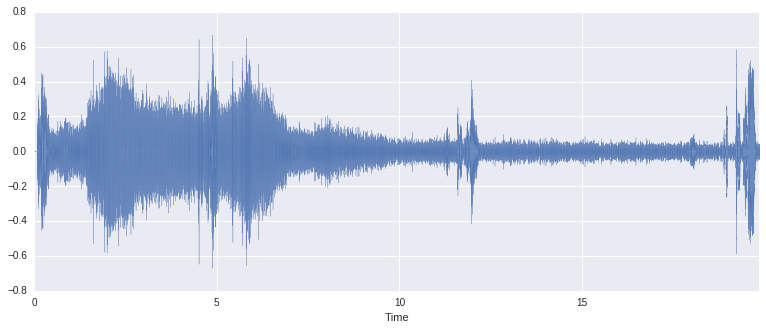

In [9]:
librosa.display.waveplot(x, sr, alpha=0.8)

In [10]:
#r = librosa.autocorrelate(x, max_size=10000)
#print r.shape

## Espectrograma de MEL

In [11]:
## Espectrogramas de MEL
#http://nbviewer.jupyter.org/github/bmcfee/librosa/blob/master/examples/LibROSA%20demo.ipynb

In [12]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# and IPython.display for audio output
import IPython.display
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [13]:
from __future__ import print_function

In [14]:
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)


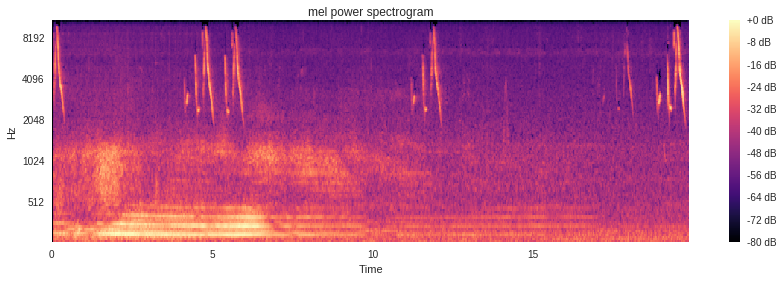

In [15]:
log_S = librosa.logamplitude(S, ref_power=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

## Harmonic-percussive source separation

In [16]:
y_harmonic, y_percussive = librosa.effects.hpss(x)

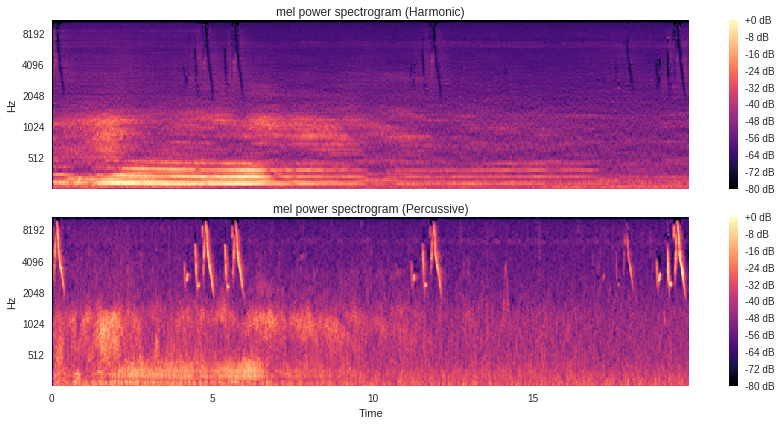

In [17]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


## Coeficientes cepstrales de Mel

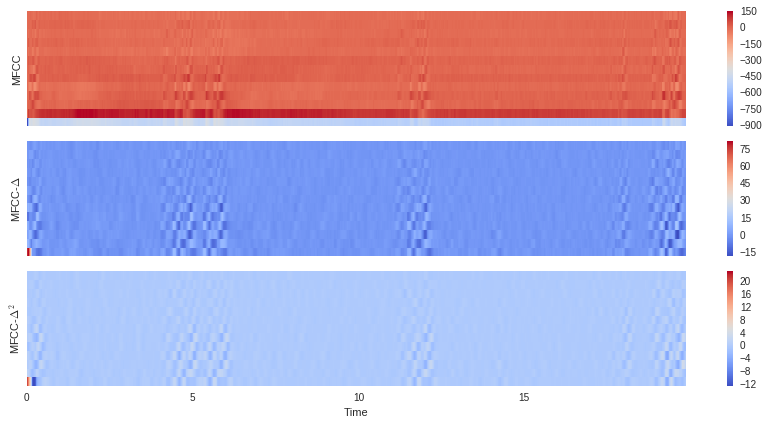

In [18]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

In [19]:
feature_table = numpy.vstack((kick_features, snare_features))
print feature_table.shape

SyntaxError: invalid syntax (<ipython-input-19-eef62ea6b454>, line 2)

In [ ]:
## Leer de aca